<br>
<p style="text-align: right;">Hernandez Franco Angel Josue</p>

<hr style="border: 1px solid grey; width: 100%;">

<h1 style="text-align: center; color:  rgb(0, 0, 255);">Práctica 3. Movimiento rectilíneo en coordenadas rectangulares: tiro parabólico</h1>

<h3 style="text-align: Left; color:  rgb(0, 0, 0);">Metodología</h3>

1. <span style="padding-left:5px"></span>Abrir el software Matlab Académico.
2. <span style="padding-left:5px"></span>Generar un archivo script nuevo como se observa en la Figura 3.
3. <span style="padding-left:5px"></span>Una vez generado el script, realizar un programa para resolver el siguiente problema:<br>En un partido de fútbol, un futbolista patea una pelota a una velocidad de 10 m/s con un ángulo de 37° con la horizontal. Si se encuentra en ese instante a 8 m de distancia del arco contrario, ¿hay posibilidad de gol? La altura del arco es de 2.5m.
5. <span style="padding-left:5px"></span>Emplear del bucle for para la solución.
6. <span style="padding-left:5px"></span>Emplear el comando fprintf para generar las tablas de los resultados.
7. <span style="padding-left:5px"></span>Emplear el comando subplot para generar las gráficas de los resultados.
8. <span style="padding-left:5px"></span>Colocar la solución analítica.
9. <span style="padding-left:5px"></span>¿Hay probabilidad de gol?
10. <span style="padding-left:5px"></span>Mostrar la tabla donde se muestre el comportamiento del sistema, por ejemplo, como la mostrada en la figura 4.
11. <span style="padding-left:5px"></span>Obtener las gráficas de la tabla del punto 3 usando la función de subplot.
12. <span style="padding-left:5px"></span>Incluir una gráfica más, mostrando el comportamiento de desplazamiento en ambas direcciones “x”, “y”.

   t(s) |    x(m) |    y(m) |  vy(m/s)
--------------------------------------------------
  0.000 |   0.000 |   0.000 |    6.018
  0.050 |   0.399 |   0.289 |    5.528
  0.100 |   0.799 |   0.553 |    5.037
  0.150 |   1.198 |   0.792 |    4.547
  0.200 |   1.597 |   1.007 |    4.056
  0.250 |   1.997 |   1.198 |    3.566
  0.300 |   2.396 |   1.364 |    3.075
  0.350 |   2.795 |   1.505 |    2.585
  0.400 |   3.195 |   1.622 |    2.094
  0.450 |   3.594 |   1.715 |    1.604
  0.500 |   3.993 |   1.783 |    1.113
  0.550 |   4.392 |   1.826 |    0.623
  0.600 |   4.792 |   1.845 |    0.132
  0.650 |   5.191 |   1.839 |   -0.358
  0.700 |   5.590 |   1.809 |   -0.849
  0.750 |   5.990 |   1.755 |   -1.339
  0.800 |   6.389 |   1.675 |   -1.830
  0.850 |   6.788 |   1.572 |   -2.320
  0.900 |   7.188 |   1.443 |   -2.811
  0.950 |   7.587 |   1.290 |   -3.301
  1.000 |   7.986 |   1.113 |   -3.792
  1.050 |   8.386 |   0.911 |   -4.282
  1.100 |   8.785 |   0.685 |   -4.773
  1.150 |   9

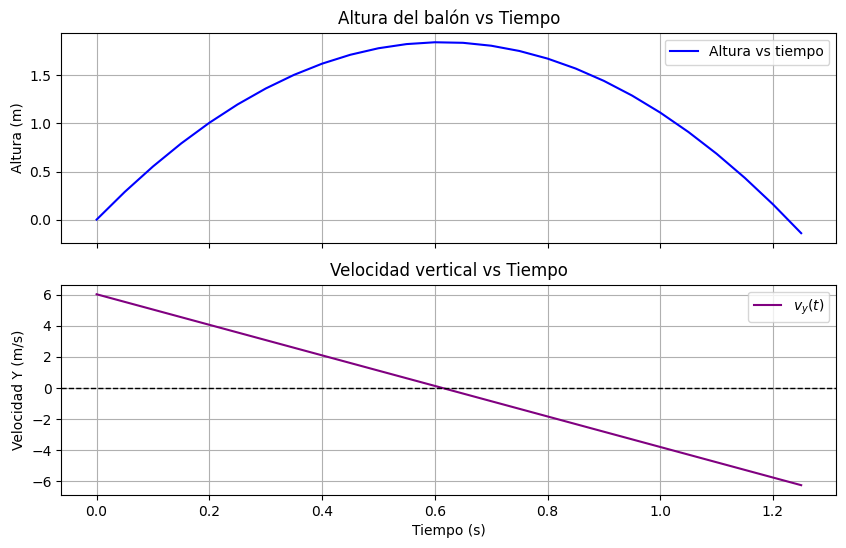

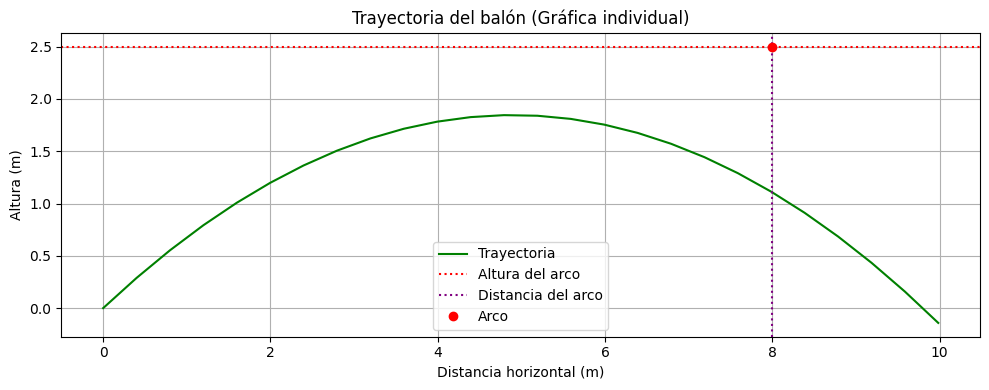

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib.ticker import MultipleLocator
import numpy as np
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib.ticker import MultipleLocator
import sympy as sp

# Problema
vi = 10
theta_gr = 37
s = 8
h_arco = 2.5
g = 9.81

# Arreglos
θ = np.radians(theta_gr)
vix = vi * np.cos(θ)
viy = vi * np.sin(θ)

# Tiempo total de vuelo (cuando vuelve al suelo)
t_total = (2 * viy) / g

# Valores de tiempo
pt = 0.05
t_val = np.arange(0, t_total + pt, pt)

# Listas para valores
x_val = []
y_val = []
vy_val = []

# Encabezado tabla
print(f"{'t(s)':>7} | {'x(m)':>7} | {'y(m)':>7} | {'vy(m/s)':>8}")
print("-" * 50)

# Calcular posiciones y velocidades
for t in t_val:
    x = vix * t
    y = viy * t - 0.5 * g * t**2
    vy = viy - g * t

    x_val.append(x)
    y_val.append(y)
    vy_val.append(vy)

    print(f"{t:7.3f} | {x:7.3f} | {y:7.3f} | {vy:8.3f}")

# Convertir listas a arrays
x_val = np.array(x_val)
y_val = np.array(y_val)
vy_val = np.array(vy_val)

# Altura al llegar al arco
pos_elmt_arco = np.argmin(np.abs(x_val - s))
altura = y_val[pos_elmt_arco]

print(f"\n\n\nLa altura última antes de la colisión con el arco es \033[4;33m{altura:.4f} m\033[0m.")

if 0 <= altura <= h_arco:
    print("Por lo tanto, SÍ hay posibilidad de gol.\n\n")
else:
    print("Por lo tanto, NO hay posibilidad de gol.\n\n")

# Subgráficas de posición
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Altura vs tiempo
axs[0].plot(t_val, y_val, label='Altura vs tiempo', color='blue')
axs[0].set_ylabel("Altura (m)")
axs[0].set_title("Altura del balón vs Tiempo")
axs[0].grid(True)
axs[0].legend()

# Velocidad vertical (varía)
axs[1].plot(t_val, vy_val, label=r'$v_y(t)$', color='purple')
axs[1].axhline(0, color='black', linestyle='--', linewidth=1)
axs[1].set_ylabel("Velocidad Y (m/s)")
axs[1].set_xlabel("Tiempo (s)")
axs[1].set_title("Velocidad vertical vs Tiempo")
axs[1].grid(True)
axs[1].legend()

# Trayectoria
plt.figure(figsize=(10, 4))

plt.plot(x_val, y_val, label='Trayectoria', color='green')
plt.axhline(h_arco, color='r', linestyle=':', label='Altura del arco')
plt.axvline(s, color='purple', linestyle=':', label='Distancia del arco')
plt.plot(s, h_arco, 'ro', label='Arco')

plt.ylabel("Altura (m)")
plt.xlabel("Distancia horizontal (m)")
plt.title("Trayectoria del balón (Gráfica individual)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


En un partido de fútbol, un futbolista patea una pelota a una velocidad de 10 m/s con un ángulo de 37° con la horizontal. Si se encuentra en ese instante a 8 m de distancia del arco contrario, ¿hay posibilidad de gol? La altura del arco es de 2.5m.

Analiticamente obtenemos:
<div style="margin-left: 160px;">
    $v_0(t)= 10\frac{m}{s}$<br>
    $v_{0x} = v_0\times\cos(θ) = 7.9863551$<br>
    $v_{0y} = v_0\times\sin(θ) = 6.018150232$<br>
</div>
Ya que no se mencionan resistencia al aire podemos interpretar que la velocidad en $x$ es constante, mientras en $y$ tenemos una desaceleración dada por $g$, por lo que obtenemos:
<br>Desplazamiento horizontal
<div style="margin-left: 160px;">
    $x = v_{0x}*t \quad \Rightarrow \quad t= \frac{x}{v_{0x}}=\frac{8}{7.9863551}=$ <span style="background-color: yellow;"> $1.001708527$s </span><br>
</div><br>

Desplazamiento vertical
<div style="margin-left: 160px;">
    $y= v_{0y}\times t -\left( \frac{1}{2}\times g\times t^2\right)=$<span style="background-color: yellow;"> $1.106657436$m </span>
</div><br>
Para una $v_0 = 10\frac{m}{s}$ con un agulo de $37°$ y una distancia de $8$m se obtiene que la altura de la pelota en esas condiciones es de $1.106657436$m.
<br><br>
Comparando los resultados del código con los obtenidos analíticamente, podemos deducir que <span style="background-color: yellow;"> sí hay posibilidad de gol</span> bajo las condiciones proporcionadas, ya que la altura al momento de llegar al arco es menor a 2.5 m.

